In [48]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import thinkstats2
import thinkplot
import matplotlib
import pandas as pd

In [49]:
df = pd.read_csv('Pitching.csv')

In [50]:
ten = df.SO[df.yearID == 2003].dropna()
eleven = df.SO[df.yearID == 2005].dropna()

In [51]:
ten

34888     32
34889     23
34890     19
34891      9
34892     51
34893      3
34894     98
34895     48
34896      4
34897     51
34898     49
34899      7
34900      6
34901     26
34902      6
34903      3
34904     82
34905     72
34906     15
34907      9
34908      7
34909     13
34910     13
34911     50
34912      5
34913     23
34914     14
34915     27
34916     41
34917     20
        ... 
35534      0
35535     37
35536     17
35537    142
35538     88
35539     20
35540     19
35541     53
35542     21
35543    153
35544     42
35545     93
35546     42
35547    177
35548     12
35549    266
35550     15
35551     65
35552     47
35553     19
35554     41
35555      9
35556     33
35557     25
35558     28
35559     18
35560    168
35561    132
35562     17
35563    146
Name: SO, dtype: int64

In [52]:
eleven

36244     16
36245     31
36246     14
36247      4
36248      1
36249     39
36250     16
36251      2
36252      3
36253      1
36254     16
36255     17
36256      2
36257      4
36258     34
36259     59
36260    100
36261     66
36262     45
36263     33
36264      9
36265     40
36266     27
36267     97
36268     51
36269      3
36270     32
36271     12
36272      9
36273      8
        ... 
36868    170
36869     11
36870     59
36871      2
36872     19
36873     23
36874     38
36875    106
36876     30
36877     30
36878     62
36879     40
36880     33
36881     61
36882     77
36883     60
36884     20
36885      3
36886     17
36887     22
36888    101
36889     34
36890     89
36891     22
36892     44
36893     45
36894    137
36895    202
36896    112
36897    171
Name: SO, dtype: int64

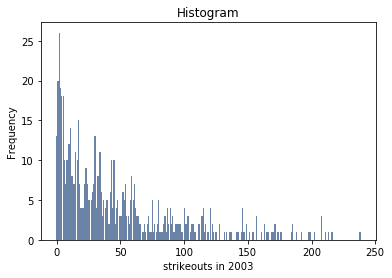

In [53]:
hist_eleven = thinkstats2.Hist(eleven)
thinkplot.Hist(hist_eleven)
thinkplot.Show(xlabel='strikeouts in 2003',ylabel='Frequency', title='Histogram')

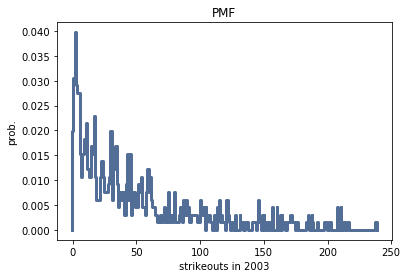

In [54]:
pmf_eleven =thinkstats2.Pmf(eleven)
thinkplot.Pmf(pmf_eleven)
thinkplot.Show(xlabel="strikeouts in 2003", ylabel ='prob.',title="PMF")

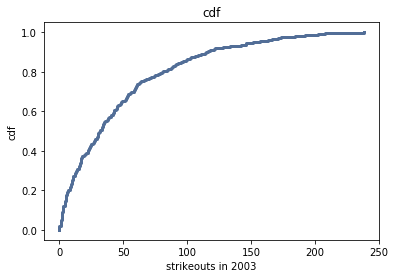

In [55]:
cdf_eleven = thinkstats2.Cdf(eleven)
thinkplot.Cdf(cdf_eleven)
thinkplot.Show(xlabel="strikeouts in 2003", ylabel='cdf', loc='upper left',title='cdf')

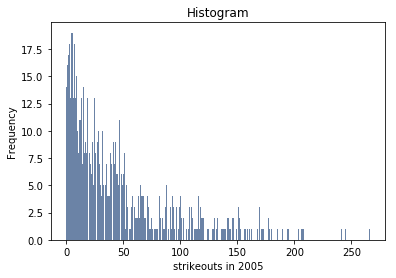

In [56]:
hist_ten = thinkstats2.Hist(ten)
thinkplot.Hist(hist_ten)
thinkplot.Show(xlabel='strikeouts in 2005',ylabel='Frequency', title='Histogram')


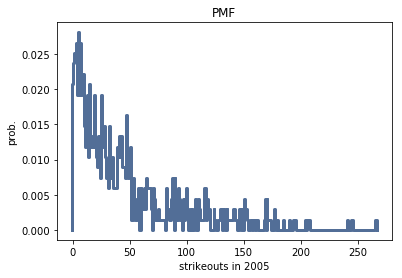

In [57]:
pmf_ten =thinkstats2.Pmf(ten)
thinkplot.Pmf(pmf_ten)
thinkplot.Show(xlabel="strikeouts in 2005", ylabel ='prob.',title="PMF")

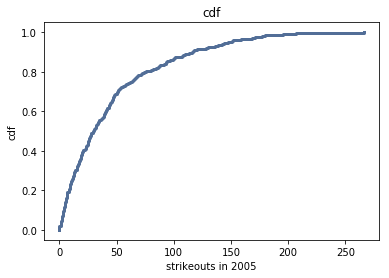

In [58]:
cdf_ten = thinkstats2.Cdf(ten)
thinkplot.Cdf(cdf_ten)
thinkplot.Show(xlabel="strikeouts in 2005", ylabel='cdf', loc='upper left',title='cdf')

In [59]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank
PercentileRank(eleven,50)

65.4434250764526

In [60]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank
PercentileRank(ten,50)

69.8224852071006

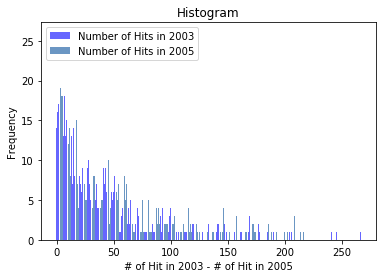

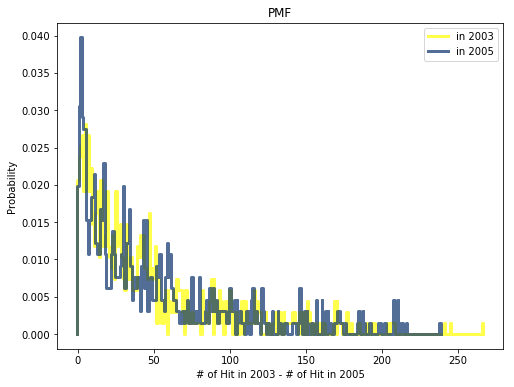

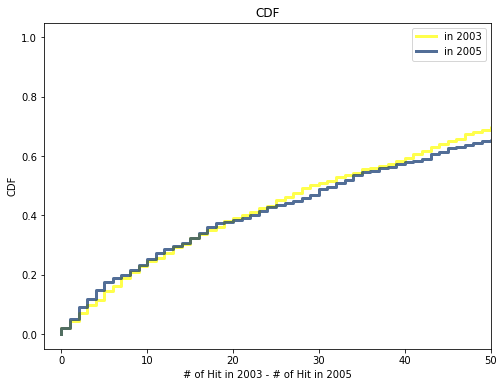

In [61]:
histogramone = thinkstats2.Hist(ten,label='Number of Hits in 2003')
histogramtwo = thinkstats2.Hist(eleven,label='Number of Hits in 2005')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(histogramone, align='right', width=width,color='blue')
thinkplot.Hist(histogramtwo, align='left', width=width)
thinkplot.Show(xlabel='# of Hit in 2003 - # of Hit in 2005', ylabel='Frequency',title='Histogram',loc='upper left')


pmf1 = thinkstats2.Pmf(ten,label='in 2003')
thinkplot.Pmf(pmf1,color='yellow')
pmf2 = thinkstats2.Pmf(eleven,label='in 2005')
thinkplot.Pmf(pmf2)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Show(xlabel='# of Hit in 2003 - # of Hit in 2005', ylabel='Probability',title='PMF')


cdf1 = thinkstats2.Cdf(ten,label='in 2003')
thinkplot.Cdf(cdf1,color='yellow')
cdf2 = thinkstats2.Cdf(eleven,label='in 2005')
thinkplot.Cdf(cdf2)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Show(xlabel='# of Hit in 2003 - # of Hit in 2005', ylabel='CDF',title='CDF',xlim=[-2,50])

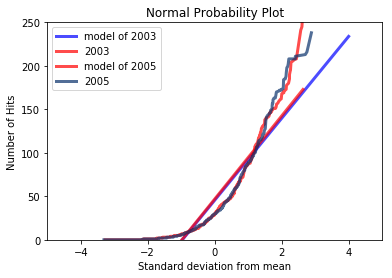

In [62]:
mean = ten.mean()
std = ten.std()
xs = [-4, 4]

thinkplot.PrePlot(4)
fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
thinkplot.Plot(fxs, fys, color='blue', label='model of 2003')

xs, ys = thinkstats2.NormalProbability(ten)
thinkplot.Plot(xs, ys, label="2003",color="red")

mean1 = eleven.mean()
std1 = eleven.std()
fxs, fys = thinkstats2.FitLine(xs, inter=mean1, slope=std1)
thinkplot.Plot(fxs, fys, color='red', label='model of 2005')

xs, ys = thinkstats2.NormalProbability(eleven)
thinkplot.Plot(xs, ys, label='2005')
thinkplot.Config(xlabel='Standard deviation from mean', 
                 ylabel='Number of Hits',
                 title='Normal Probability Plot',
                 xlim=[-5,5],
                ylim=[0,250])

In [83]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

ten_sample = SampleRows(ten, 654)

In [85]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
print('Covariance is', (Cov(ten_sample,eleven)))
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

print('Correlation is',Corr(ten_sample,eleven)*100)


Covariance is -120.039825492
Correlation is -5.3176306552


In [ ]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

ten_sample = SampleRows(NL, 12959)

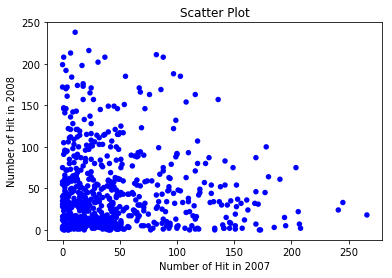

In [90]:
thinkplot.Scatter(ten_sample, eleven, alpha=1)
thinkplot.Config(xlabel='Number of Hit in 2007',
                 ylabel='Number of Hit in 2008',
                 title="Scatter Plot",
                 legend=False)


In [91]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

0.617


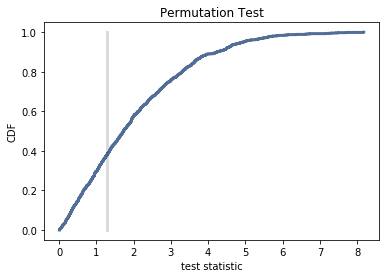

In [94]:
data = ten.values, eleven.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print (pvalue)
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF',
                title='Permutation Test')